In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Load the cleaned dataset
df = pd.read_csv('cleaned_ebay_deals.csv')


In [3]:
# Convert 'timestamp' to datetime and sort
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', inplace=True)

In [4]:
# Extract hour and group data by hour
df['hour'] = df['timestamp'].dt.hour
hourly_counts = df.groupby('hour').size()


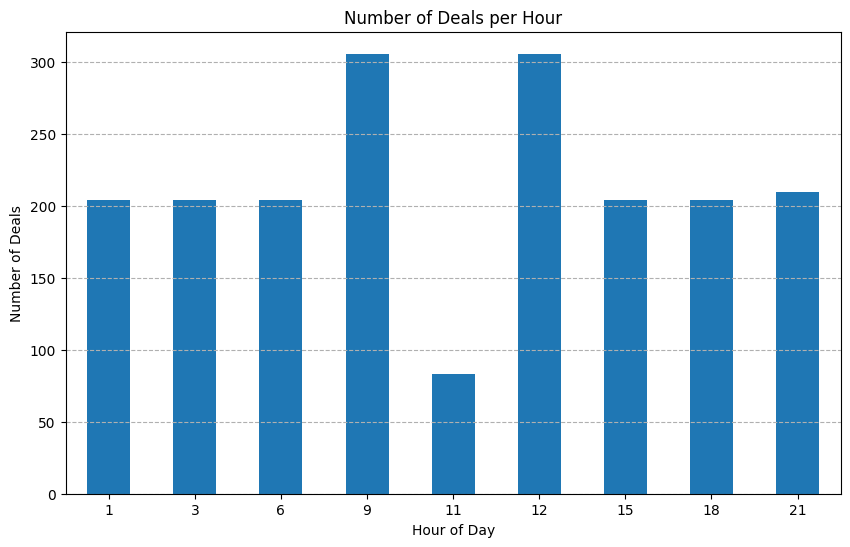

In [5]:
# Plot bar chart: Number of deals per hour
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Number of Deals per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

Text(0, 0.5, 'Frequency')

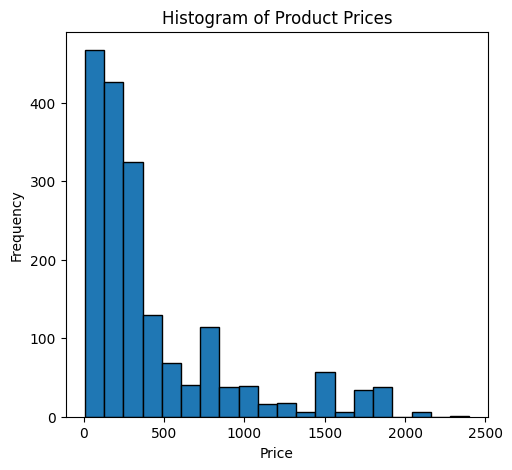

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['price'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

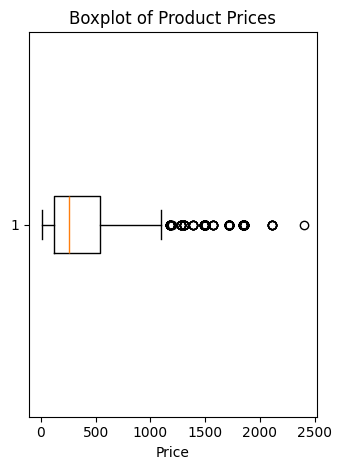

In [7]:
plt.subplot(1, 2, 2)
plt.boxplot(df['price'].dropna(), vert=False)
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

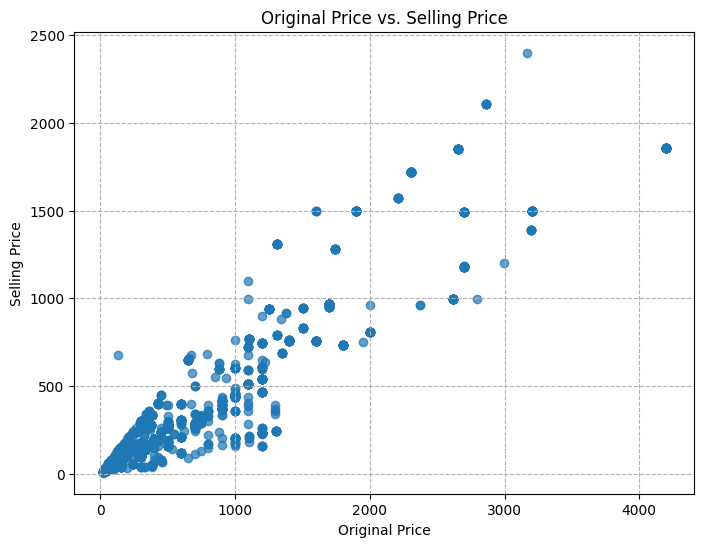

In [8]:
# Scatter plot of original_price vs. price
plt.figure(figsize=(8, 6))
plt.scatter(df['original_price'], df['price'], alpha=0.7)
plt.title('Original Price vs. Selling Price')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')
plt.grid(linestyle='--')
plt.show()


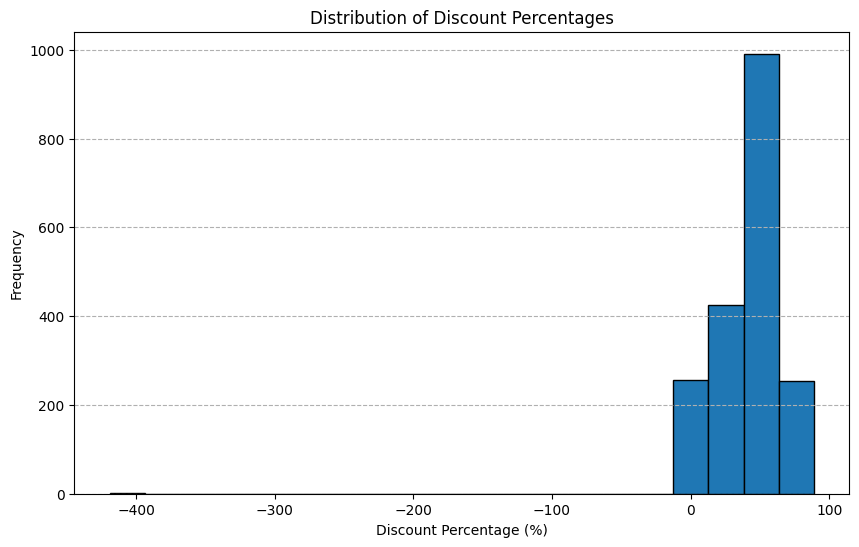

In [9]:
# Distribution of discount_percentage
plt.figure(figsize=(10, 6))
plt.hist(df['discount_percentage'], bins=20, edgecolor='black')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

C:\Users\abouo\AppData\Local\Temp\ipykernel_15012\3718580677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette='Blues_d')


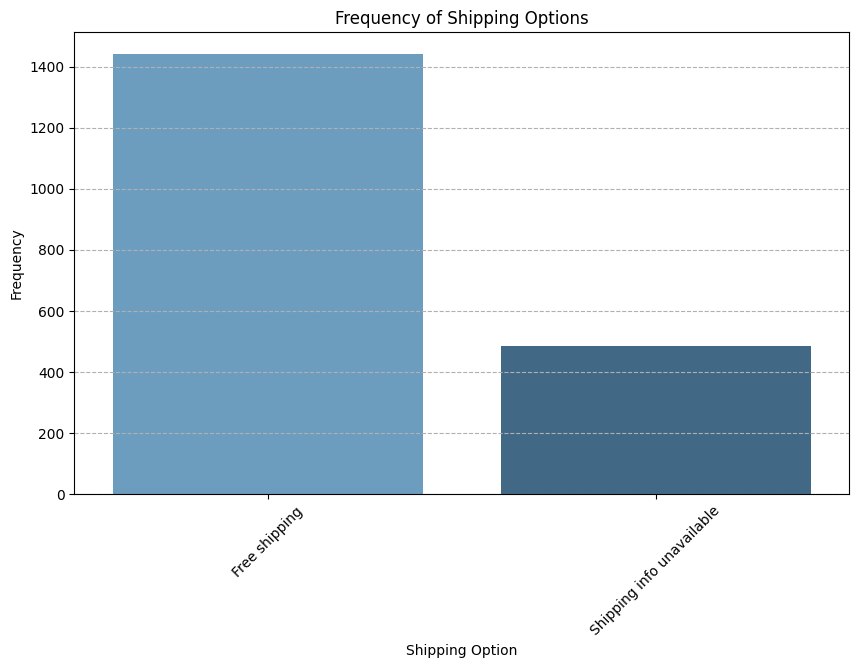

In [11]:
# Shipping Information Analysis

shipping_counts = df['shipping'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette='Blues_d')
plt.title('Frequency of Shipping Options')
plt.xlabel('Shipping Option')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

C:\Users\abouo\AppData\Local\Temp\ipykernel_15012\3766964237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()), palette='viridis')


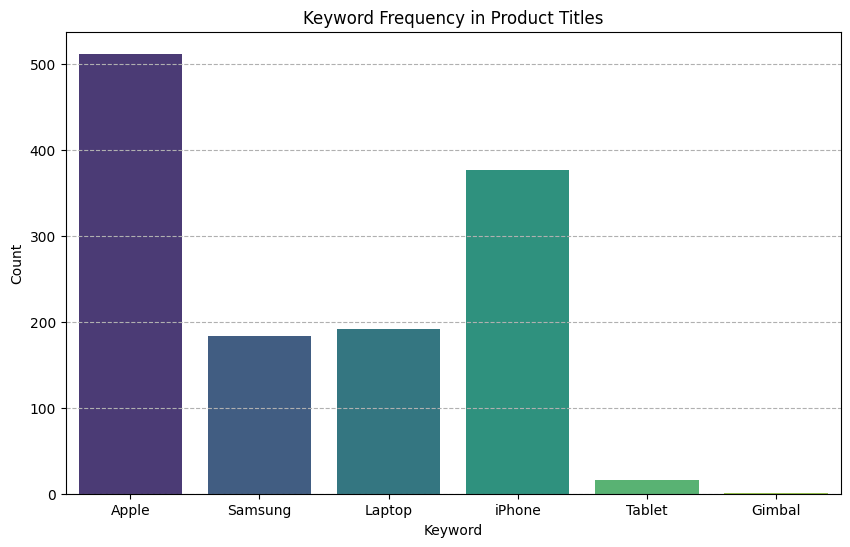

In [12]:
# Text Analysis on Product Titles
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]
keyword_counts = {keyword: df['title'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()), palette='viridis')
plt.title('Keyword Frequency in Product Titles')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

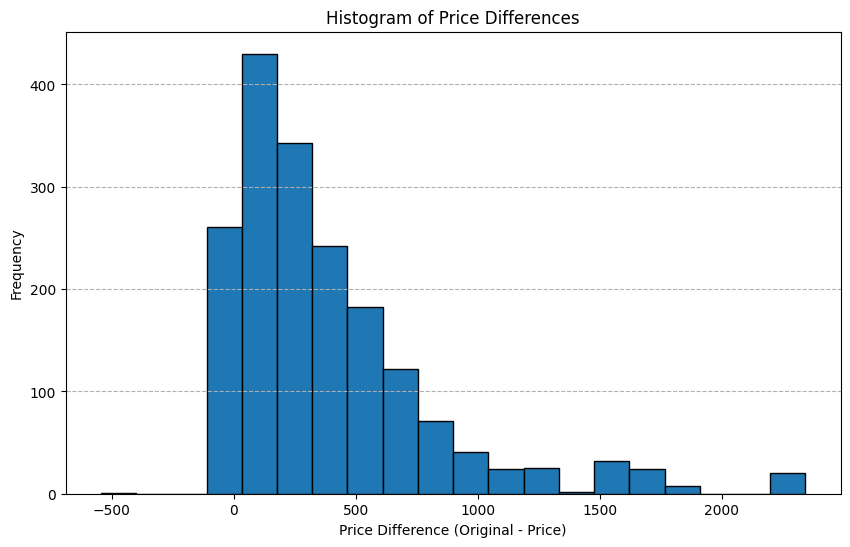

In [13]:
# Price Difference Analysis
df['price_difference'] = df['original_price'] - df['price']

plt.figure(figsize=(10, 6))
plt.hist(df['price_difference'], bins=20, edgecolor='black')
plt.title('Histogram of Price Differences')
plt.xlabel('Price Difference (Original - Price)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [14]:
# Top 5 deals by Discount Percentage
top_deals = df.sort_values(by='discount_percentage', ascending=False).head(5)
top_deals

,timestamp,title,price,original_price,shipping,item_url,discount_percentage,price_difference
301,2025-03-20 15:24:54,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,40.99,379.99,Shipping info unavailable,https://www.ebay.com/itm/255891868634?_trkparm...,89.21,339.00
623,2025-03-21 01:47:02,Samsung Galaxy Watch4 44mm R870 GPS - Good,37.99,299.99,Shipping info unavailable,https://www.ebay.com/itm/255870647774?_trkparm...,87.34,262.00
722,2025-03-21 03:32:16,Samsung Galaxy Watch4 44mm R870 GPS - Good,37.99,299.99,Shipping info unavailable,https://www.ebay.com/itm/255870647774?_trkparm...,87.34,262.00
304,2025-03-20 15:24:54,Samsung Galaxy Watch4 44mm R870 GPS - Good,37.99,299.99,Shipping info unavailable,https://www.ebay.com/itm/255870647774?_trkparm...,87.34,262.00
124,2025-03-20 09:56:46,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,Free shipping,https://www.ebay.com/itm/387587045897?_trkparm...,87.25,287.05
